In [1]:
%matplotlib inline

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# People's Taste in Alcohol
## An exploration of beer and wine ratings
## Author: 
#### Abstract
TODO

#### Getting data

In [6]:
beer_reviews = pd.read_csv("./data/beer_reviews.csv", index_col="beer_beerid")

/Users/marto/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv
beer_beerid,,,,,,,,,,,,
47986,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0
48213,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2
48215,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5
47969,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0
64883,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7


In [8]:
beer_reviews.shape

(1586614, 12)

In [13]:
beer_reviews = beer_reviews[["brewery_id", "brewery_name", "review_profilename","review_time", "beer_style","beer_name", "beer_abv", "review_overall","review_aroma", "review_appearance","review_palate", "review_taste"]]

In [14]:
beer_reviews.head()

,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
beer_beerid,,,,,,,,,,,,
47986,10325,Vecchio Birraio,stcules,1234817823,Hefeweizen,Sausa Weizen,5.0,1.5,2.0,2.5,1.5,1.5
48213,10325,Vecchio Birraio,stcules,1235915097,English Strong Ale,Red Moon,6.2,3.0,2.5,3.0,3.0,3.0
48215,10325,Vecchio Birraio,stcules,1235916604,Foreign / Export Stout,Black Horse Black Beer,6.5,3.0,2.5,3.0,3.0,3.0
47969,10325,Vecchio Birraio,stcules,1234725145,German Pilsener,Sausa Pils,5.0,3.0,3.0,3.5,2.5,3.0
64883,1075,Caldera Brewing Company,johnmichaelsen,1293735206,American Double / Imperial IPA,Cauldron DIPA,7.7,4.0,4.5,4.0,4.0,4.5


In [15]:
beer_reviews.dtypes

brewery_id              int64
brewery_name           object
review_profilename     object
review_time             int64
beer_style             object
beer_name              object
beer_abv              float64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_palate         float64
review_taste          float64
dtype: object

In [17]:
beer_reviews.review_time = pd.to_datetime(beer_reviews.review_time, unit = "s")

In [18]:
beer_reviews.dtypes

brewery_id                     int64
brewery_name                  object
review_profilename            object
review_time           datetime64[ns]
beer_style                    object
beer_name                     object
beer_abv                     float64
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_palate                float64
review_taste                 float64
dtype: object

In [19]:
beer_reviews.review_time.min(), beer_reviews.review_time.max()

(Timestamp('1996-08-22 00:00:01'), Timestamp('2012-01-11 12:35:48'))

In [25]:
review_counts_by_year = beer_reviews.groupby(beer_reviews.review_time.dt.year).size()

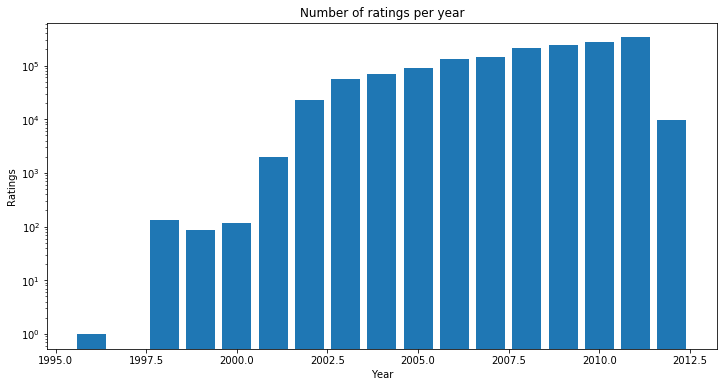

In [42]:
min_year, max_year = beer_reviews.review_time.min().year, beer_reviews.review_time.max().year
plt.figure(figsize=(12, 6))
plt.bar(review_counts_by_year.index, review_counts_by_year.values)
plt.title("Number of ratings per year")
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.yticks(range(min_year, max_year + 1))
plt.yscale("log")
plt.show()

In [44]:
review_counts_by_month = beer_reviews.groupby(beer_reviews.review_time.dt.month).size()
review_counts_by_month

review_time
1     142123
2     122020
3     130983
4     121689
5     127503
6     120425
7     128448
8     136001
9     129376
10    135975
11    140558
12    151513
dtype: int64

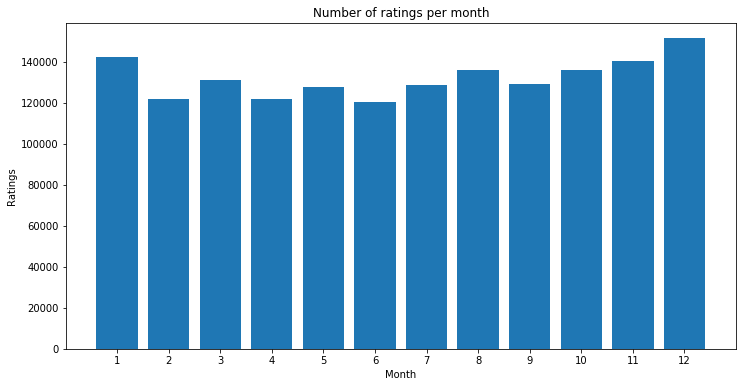

In [46]:
plt.figure(figsize=(12, 6))
plt.bar(review_counts_by_month.index, review_counts_by_month.values)
plt.title("Number of ratings per month")
plt.xlabel("Month")
plt.ylabel("Ratings")
plt.xticks(range(1, 12 + 1))
# plt.yscale("log")
plt.show()

In [51]:
review_counts_by_day = beer_reviews.groupby(beer_reviews.review_time.dt.date).size()
review_counts_by_day

review_time
1996-08-22       1
1998-01-10       1
1998-01-13       1
1998-01-21       1
1998-01-22       1
1998-01-28       1
1998-02-06       1
1998-02-10       2
1998-02-11       2
1998-02-14       2
1998-02-17       2
1998-02-18       1
1998-02-19       4
1998-02-21       2
1998-02-22       2
1998-03-02       2
1998-03-03       1
1998-03-05       2
1998-03-06       1
1998-03-07       1
1998-03-08       1
1998-03-09       1
1998-03-15       1
1998-03-23       1
1998-03-24       2
1998-04-03       1
1998-04-09       1
1998-04-16       1
1998-04-23       3
1998-04-30       1
              ... 
2011-12-13     753
2011-12-14     675
2011-12-15     789
2011-12-16     772
2011-12-17     922
2011-12-18     989
2011-12-19     776
2011-12-20     804
2011-12-21     746
2011-12-22     878
2011-12-23     892
2011-12-24     934
2011-12-25     758
2011-12-26     790
2011-12-27     867
2011-12-28     859
2011-12-29     869
2011-12-30     994
2011-12-31    1046
2012-01-01     873
2012-01-02    1055


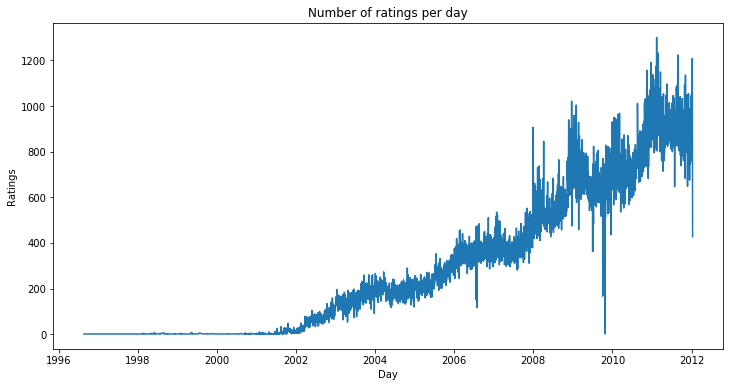

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(review_counts_by_day.index, review_counts_by_day)
plt.title("Number of ratings per day")
plt.xlabel("Day")
plt.ylabel("Ratings")
# plt.yscale("log")
plt.show()

In [54]:
# We will try to found out which columns has missed values
beer_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3130.099202,5578.103987,1.00,143.0,429.0,2372.0,28003.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.2,6.5,8.5,57.7
review_overall,1586614.0,3.815581,0.720622,0.00,3.5,4.0,4.5,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.5,4.0,4.0,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.5,4.0,4.0,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.5,4.0,4.0,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.5,4.0,4.5,5.0


In [55]:
beer_reviews.isna().any()

brewery_id            False
brewery_name           True
review_profilename     True
review_time           False
beer_style            False
beer_name             False
beer_abv               True
review_overall        False
review_aroma          False
review_appearance     False
review_palate         False
review_taste          False
dtype: bool

In [57]:
beer_reviews.isna().sum() / len(beer_reviews) * 100

brewery_id            0.000000
brewery_name          0.000945
review_profilename    0.021934
review_time           0.000000
beer_style            0.000000
beer_name             0.000000
beer_abv              4.272306
review_overall        0.000000
review_aroma          0.000000
review_appearance     0.000000
review_palate         0.000000
review_taste          0.000000
dtype: float64

In [58]:
beer_reviews[beer_reviews.beer_abv.isnull()]

,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
beer_beerid,,,,,,,,,,,,
21241,1075,Caldera Brewing Company,RedDiamond,2004-12-21 22:29:55,American Stout,Cauldron Espresso Stout,NaN,3.0,3.0,3.0,4.0,3.0
20689,850,Moon River Brewing Company,cMonkey,2005-03-13 17:48:30,Scotch Ale / Wee Heavy,The Highland Stagger,NaN,3.5,4.0,4.5,3.5,3.5
20689,850,Moon River Brewing Company,aracauna,2004-11-09 22:20:19,Scotch Ale / Wee Heavy,The Highland Stagger,NaN,4.0,3.5,4.0,3.5,3.5
54723,1075,Caldera Brewing Company,plaid75,2009-12-13 03:12:01,American IPA,Alpha Beta,NaN,4.0,4.0,4.0,4.0,4.0
42964,1075,Caldera Brewing Company,grumpy,2008-05-31 02:34:28,American Double / Imperial Stout,Imperial Stout,NaN,4.5,4.5,4.0,4.0,4.5
64803,2724,Pacific Coast Brewing Company,womencantsail,2010-12-28 17:57:56,American Strong Ale,Megalodon,NaN,1.0,1.5,3.0,2.5,1.5
41584,2724,Pacific Coast Brewing Company,JDV,2008-03-15 20:49:14,Belgian Strong Pale Ale,Holiday Trappist Style Ale,NaN,1.5,2.0,1.5,1.0,3.0
37498,2724,Pacific Coast Brewing Company,hoegaardenhero,2008-07-11 02:30:07,American Amber / Red Ale,Emerald Ale,NaN,4.0,3.5,4.0,4.5,3.5
37498,2724,Pacific Coast Brewing Company,barleywinefiend,2008-02-19 00:08:19,American Amber / Red Ale,Emerald Ale,NaN,4.0,4.0,4.0,4.0,4.0


In [59]:
len(beer_reviews[beer_reviews.beer_abv.isnull()].brewery_name.unique())

2779

In [60]:
len(beer_reviews.brewery_name.unique())

5743

In [61]:
# "review_overall","review_aroma", "review_appearance","review_palate", "review_taste"

In [74]:
def plot_rating_histogram(column_name, show = True):
    alpha = 1 if show else 0.5
    plt.hist(beer_reviews["review_" + column_name], bins = 11, label=column_name, alpha=alpha)
    
    plt.title("Distribution of {} rating".format(column_name))
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.legend()
    if show:
        plt.show()


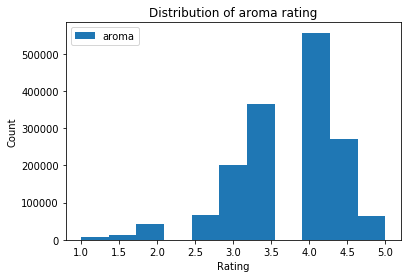

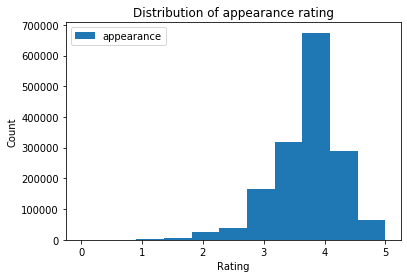

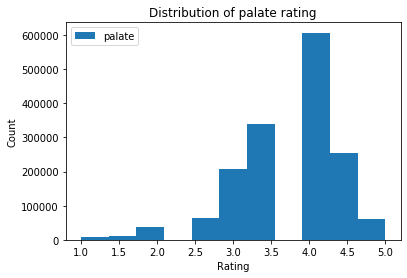

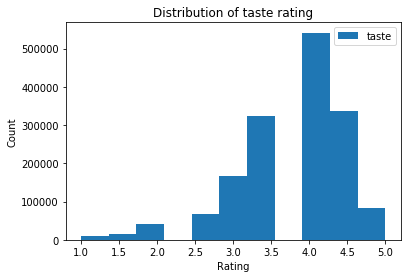

In [75]:
plot_rating_histogram("aroma")
plot_rating_histogram("appearance")
plot_rating_histogram("palate")
plot_rating_histogram("taste")

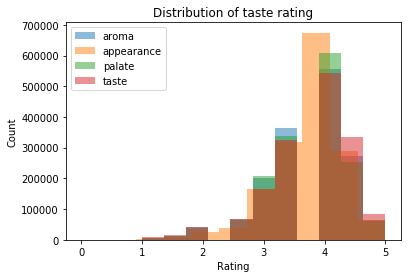

In [76]:
plot_rating_histogram("aroma", show=False)
plot_rating_histogram("appearance", show=False)
plot_rating_histogram("palate", show=False)
plot_rating_histogram("taste", show=False)

In [77]:
beer_reviews[beer_reviews.review_appearance == 0]

,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
beer_beerid,,,,,,,,,,,,
3806,1413,Desert Edge Brewery,beernut7,2002-08-24 14:01:10,Czech Pilsener,Pub Pils,4.0,0.0,2.0,0.0,3.0,2.0
3804,1413,Desert Edge Brewery,beernut7,2002-08-25 09:19:18,Irish Dry Stout,Latter Days Stout,4.0,0.0,4.0,0.0,2.0,2.0
3810,1413,Desert Edge Brewery,beernut7,2002-08-25 09:14:49,American Pale Ale (APA),Utah Pale Ale,4.0,0.0,3.0,0.0,2.0,2.0
3788,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:17:39,Hefeweizen,Red Rock Bavarian Weiss,4.0,0.0,2.0,0.0,2.5,2.0
3787,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:22:22,American Amber / Red Ale,Red Rock Amber Ale,4.0,0.0,3.0,0.0,2.5,3.5
3822,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:15:37,German Pilsener,Red Rock Pilsner,4.0,0.0,2.0,0.0,3.0,1.5
3786,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:20:39,Dunkelweizen,Red Rock Dunkel Weizen,4.0,0.0,2.0,0.0,2.5,2.0


In [78]:
beer_reviews = beer_reviews[beer_reviews.review_overall > 0]

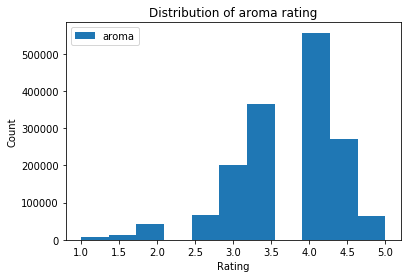

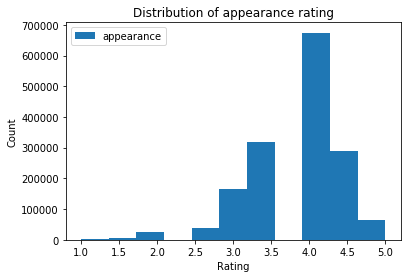

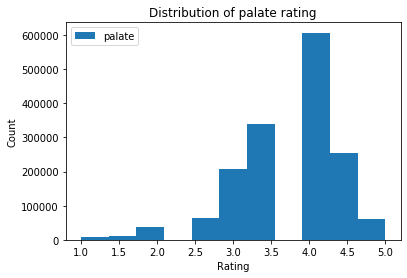

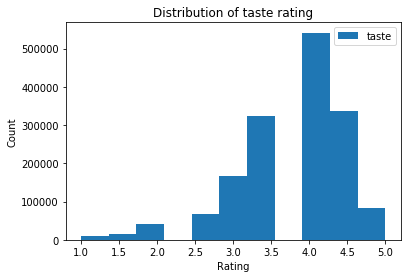

In [80]:
plot_rating_histogram("aroma")
plot_rating_histogram("appearance")
plot_rating_histogram("palate")
plot_rating_histogram("taste")

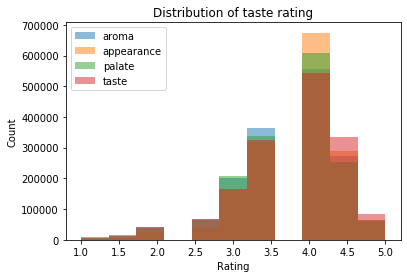

In [81]:
plot_rating_histogram("aroma", show=False)
plot_rating_histogram("appearance", show=False)
plot_rating_histogram("palate", show=False)
plot_rating_histogram("taste", show=False)

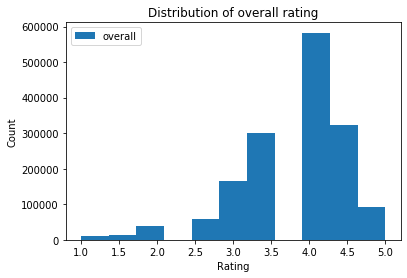

In [82]:
plot_rating_histogram("overall")

In [92]:
# plt.scatter(beer_reviews.review_aroma, beer_reviews.review_overall)
# plt.show()
review_overall_vs_aroma_crosstab = pd.crosstab(beer_reviews.review_overall, beer_reviews.review_aroma)

In [89]:
beer_reviews[["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]].corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616017,0.501661,0.701920,0.789822
review_aroma,0.616017,1.000000,0.561036,0.616946,0.716774
review_appearance,0.501661,0.561036,1.000000,0.566637,0.546972
review_palate,0.701920,0.616946,0.566637,1.000000,0.734132
review_taste,0.789822,0.716774,0.546972,0.734132,1.000000


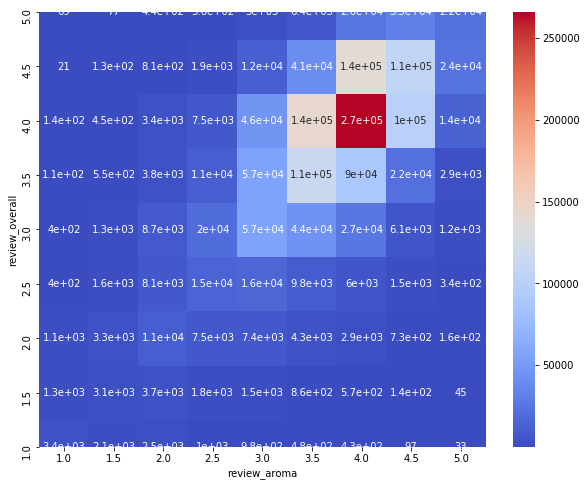

In [96]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(review_overall_vs_aroma_crosstab, annot = True, cmap = "coolwarm")
ax.invert_yaxis()

In [99]:
wine_reviews = pd.read_csv('./data/winemag.csv', index_col=0)

In [100]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [101]:
wine_reviews.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [102]:
wine_reviews.shape

(150930, 10)

In [105]:
top_wine_styles = wine_reviews.groupby("variety").size().sort_values(ascending=False).head(10)
top_wine_styles

variety
Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
dtype: int64

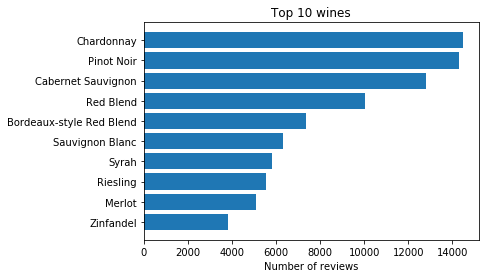

In [108]:
plt.barh(range(len(top_wine_styles.index)), top_wine_styles)

plt.title("Top 10 wines")
plt.xlabel("Number of reviews")
plt.yticks(range(len(top_wine_styles)), top_wine_styles.index)
plt.gca().invert_yaxis()
plt.show()

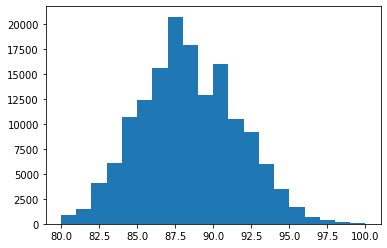

In [113]:
plt.hist(wine_reviews.points, bins=20)
# plt.xlim(0, 100)
plt.show()

In [114]:
wine_reviews.points.mean()

87.8884184721394

In [115]:
wine_reviews.points.median()

88.0

In [116]:
wine_reviews.points.mode()

0    87
dtype: int64

In [118]:
wine_reviews.points.skew()

0.14283263376595492

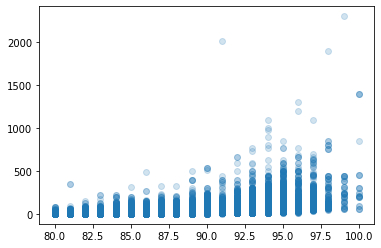

In [121]:
plt.scatter(wine_reviews.points, wine_reviews.price, alpha = 0.2)
plt.show()

In [123]:
highest_rated_wines = wine_reviews[wine_reviews.points == wine_reviews.points.max()]

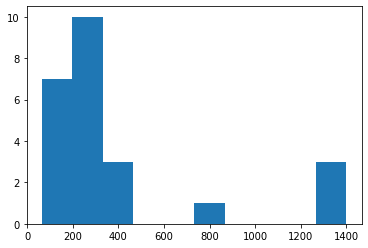

In [124]:
plt.hist(highest_rated_wines.price)
plt.show()